In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import statsmodels.distributions.empirical_distribution as distr
import seaborn as sns
from statsmodels.stats.descriptivestats import sign_test

In [2]:
DF = pd.read_excel(r'C:\Users\Админ\Python\бдз\Задание к бдз\data_matstat_K5.xls', sheet_name=1)

In [3]:
DF.head(12)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
0,1061,Alaska Pacific University,AK,IIB,454,382,362,382,N,567,485,471,487,N,6,11,9,4,32,N
1,1063,Univ.Alaska-Fairbanks,AK,I,686,560,432,508,Y,914,753,572,677,Y,74,125,118,40,404,Y
2,1065,Univ.Alaska-Southeast,AK,IIA,533,494,329,415,N,716,663,442,559,Y,9,26,20,9,70,N
3,11462,Univ.Alaska-Anchorage,AK,IIA,612,507,414,498,Y,825,681,557,670,Y,115,124,101,21,392,Y
4,1002,Alabama Agri.&Mech. Univ.,AL,IIA,442,369,310,350,N,530,444,376,423,N,59,77,102,24,262,N
5,1004,University of Montevallo,AL,IIA,441,385,310,388,N,542,473,383,477,N,57,33,35,2,127,N
6,1008,Athens State College,AL,IIB,466,394,351,396,N,558,476,427,478,N,20,18,30,0,68,N
7,1009,Auburn University- Main,AL,I,580,437,374,455,Y,692,527,451,546,Y,366,354,301,66,1109,Y
8,1012,Birmingham Southern College,AL,IIB,498,379,322,401,N,655,501,404,523,N,34,25,27,3,89,N
9,1016,Univ. of North Alabama,AL,IIB,506,412,359,411,N,607,508,445,503,N,67,40,66,27,200,N


In [4]:
tasks =  pd.read_excel(r'C:\Users\Админ\Python\бдз\Задание к бдз\var_matstat_K5.xls')
tasks

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
0,1,A5 A6 A7,A5,A5,A5,A5 A6,A5 A6,A5,A5 A6,A4 A9,A4 A5,A5 A6,A5 A6 A7,A15 A10,A15 A10,A15 A5 A10
1,2,B7 B8 B9,B7,B7,B7,B11 B12,B11 B12,B7,B11 B12,B3 B5,B6 B1,B11 B12,B7 B8 B9,B1 B2,B1 B2,B1 B4 B2
2,3,C6 C7 C8,C6,C6,C6,C13 C14,C13 C14,C6,C13 C14,С2 С3,С3 С4,C13 C14,C6 C7 C8,С6 С13,С6 С13,С6 С4 С13
3,4,D1 D5 D6,D1,D1,D1,D1 D2,D1 D2,D1,D1 D2,D7 D8,D7 D1,D1 D2,D1 D2 D3,D4 D1,D4 D1,D4 D6 D1
4,5,A6 A7 A8,A6,A6,A6,A6 A7,A6 A7,A6,A6 A7,A4 A14,A4 A6,A6 A7,A6 A7 A8,A16 A11,A16 A11,A16 A6 A11
5,6,B10 B11 B12,B10,B10,B10,B10 B11,B10 B11,B10,B10 B11,B3 B6,B6 B2,B10 B11,B10 B11 B12,B7 B2,B7 B2,B7 B4 B2
6,7,C9 C10 C11,C9,C9,C9,C11 C12,C11 C12,C9,C11 C12,С2 С5,С5 С4,C11 C12,C9 C10 C11,С11 С13,С11 С13,С11 С4 С13
7,8,D2 D9 D10,D2,D2,D2,D1 D3,D1 D3,D2,D1 D3,D7 D12,D7 D2,D1 D5,D1 D5 D6,D5 D1,D5 D1,D5 D6 D1
8,9,A5 A7 A8,A7,A7,A7,A7 A8,A7 A8,A7,A7 A8,A4 A20,A4 A7,A7 A8,A5 A7 A8,A17 A12,A17 A12,A17 A7 A12
9,10,B13 B14 B15,B13,B13,B13,B13 B14,B13 B14,B13,B13 B14,B5 B6,B3 B13,B13 B14,B13 B14 B15,B8 B2,B8 B2,B8 B4 B2


In [5]:
task = tasks.loc[[8]]
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
8,9,A5 A7 A8,A7,A7,A7,A7 A8,A7 A8,A7,A7 A8,A4 A20,A4 A7,A7 A8,A5 A7 A8,A17 A12,A17 A12,A17 A7 A12


In [6]:
x = DF['A5']
y = DF['A7']
z = DF['A8']

1.1 Объём выборки	
Среднее	
Выборочная дисперсия	
Выборочное среднеквадратическое отклонение	
Выборочный коэффициент асимметрии	
Выборочный эксцесс	

In [7]:
sts.describe(x), sts.describe(x)[3]**(1/2)

(DescribeResult(nobs=1073, minmax=(270, 1009), mean=526.4836905871389, variance=13868.856310247458, skewness=0.6786486256734204, kurtosis=0.5304432832288937),
 117.7661084958124)

In [8]:
sts.describe(y), sts.describe(y)[3]**(1/2)

(DescribeResult(nobs=1073, minmax=(199, 576), mean=355.08853681267476, variance=2904.289728547384, skewness=0.44737126211025235, kurtosis=0.4319131904766307),
 53.89146248291453)

In [9]:
sts.describe(z), sts.describe(z)[3]**(1/2)

(DescribeResult(nobs=1073, minmax=(232, 866), mean=428.0326188257223, variance=8217.62113651222, skewness=0.8191411695756438, kurtosis=0.9757478446505425),
 90.6510956167228)

1.2. Группировка и гистограммы частот

In [10]:
x = DF['A7']

In [11]:
sts.describe(x)

DescribeResult(nobs=1073, minmax=(199, 576), mean=355.08853681267476, variance=2904.289728547384, skewness=0.44737126211025235, kurtosis=0.4319131904766307)

In [12]:
bins = int(np.floor(1 + np.log2(len(x))))
bins

11

In [13]:
h = (max(x) - min(x)) / bins
print('ширина интервалов', h)

ширина интервалов 34.27272727272727


Анализируемый признак –
Объём выборки –

а) Выбрать число групп
б) Построить таблицу частот
в) Построить гистограммы частот и полигоны частот
г) Построить график эмпирической функции распределения

частоты  [  3.  35. 132. 235. 279. 199. 126.  35.  19.   8.   2.]
относительные частоты [0.0027959  0.03261883 0.12301957 0.21901212 0.26001864 0.18546132
 0.11742777 0.03261883 0.01770736 0.00745573 0.00186393]
накопленные частоты  [   3.   38.  170.  405.  684.  883. 1009. 1044. 1063. 1071. 1073.]
относительные накопленные частоты [0.0027959  0.03541473 0.1584343  0.37744641 0.63746505 0.82292637
 0.94035415 0.97297297 0.99068034 0.99813607 1.        ]


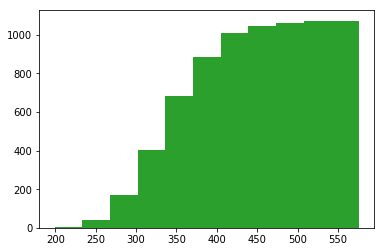

In [14]:
print('частоты ',plt.hist(x, bins = bins)[0])
print('относительные частоты',plt.hist(x, bins = bins, density=True)[0]*h)
print('накопленные частоты ',plt.hist(x, bins = bins, cumulative=True)[0])
print('относительные накопленные частоты',plt.hist(x, bins = bins, cumulative=True,density=True)[0])

Text(0.5,1,'Гистограмма и полигон частот')

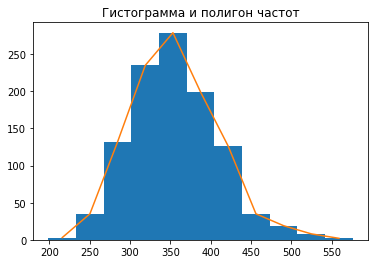

In [15]:
intervals = np.linspace(min(x),max(x), bins+1)
intervals += (intervals[1]-intervals[0])/2
y_axis = plt.hist(x, bins = bins)[0]
plt.plot(intervals[:-1], y_axis)
plt.title('Гистограмма и полигон частот')
#plt.legend()

Text(0.5,1,'Гистограмма и полигон относительных частот')

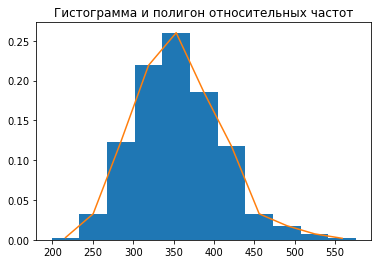

In [16]:
intervals = np.linspace(min(x),max(x), bins+1)
intervals += (intervals[1]-intervals[0])/2
y_axis = plt.hist(x, bins = bins, weights=np.zeros_like(x)+1/(len(x)))[0]
plt.plot(intervals[:-1], y_axis)
plt.title('Гистограмма и полигон относительных частот')
#plt.legend()

[199.         233.27272727 267.54545455 301.81818182 336.09090909
 370.36363636 404.63636364 438.90909091 473.18181818 507.45454545
 541.72727273 576.        ]


Text(0.5,1,'Гистограмма и полигон накопленных частот')

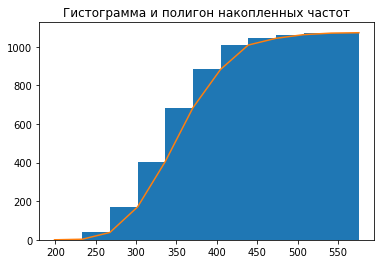

In [17]:
intervals = np.linspace(min(x),max(x), bins+1)
print(intervals)
y_axis = np.zeros(1)
y_axis = np.hstack((y_axis, plt.hist(x, bins = bins, cumulative=True)[0]))
plt.plot(intervals, y_axis)
plt.title('Гистограмма и полигон накопленных частот')
#plt.legend(loc=4)

[199.         233.27272727 267.54545455 301.81818182 336.09090909
 370.36363636 404.63636364 438.90909091 473.18181818 507.45454545
 541.72727273 576.        ]


Text(0.5,1,'Гистограмма и полигон относительных накопленных частот')

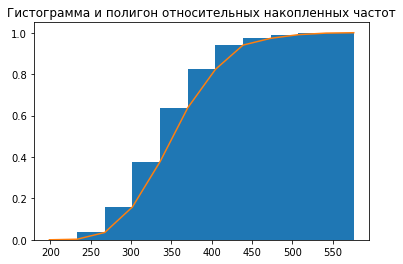

In [18]:
intervals = np.linspace(min(x),max(x), bins+1)
print(intervals)
y_axis = np.zeros(1)
y_axis = np.hstack((y_axis, plt.hist(x, bins = bins, label='гистограмма относительных накопленных частот', 
         cumulative=True,density=True)[0]))
plt.plot(intervals, y_axis, label='полигон относительных накопленных частот')
plt.title('Гистограмма и полигон относительных накопленных частот')
#plt.legend(loc=4)

Построить ЭФР

Text(0.5,1,'Эмпирическая функция распределения')

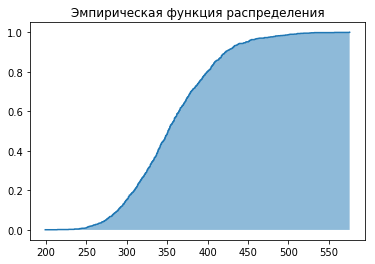

In [19]:
ecdf = distr.ECDF(x)
x_axis = np.linspace(min(x),max(x),1000)
plt.plot(x_axis,ecdf(x_axis))
plt.fill_between(x_axis, ecdf(x_axis), alpha=0.5)
plt.title('Эмпирическая функция распределения')

Интервальные оценки

2.1. Доверительные интервалы для мат. ожидания

Анализируемый признак 

Объём выборки

Оцениваемый параметр


In [20]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
8,9,A5 A7 A8,A7,A7,A7,A7 A8,A7 A8,A7,A7 A8,A4 A20,A4 A7,A7 A8,A5 A7 A8,A17 A12,A17 A12,A17 A7 A12


In [21]:
x = DF['A7']

In [22]:
sts.describe(x)

DescribeResult(nobs=1073, minmax=(199, 576), mean=355.08853681267476, variance=2904.289728547384, skewness=0.44737126211025235, kurtosis=0.4319131904766307)

Доверительный интервал для матожидания

In [23]:
for alpha in [0.01,0.05,0.1]:
    n=sts.describe(x)[0]
    low = x.mean() - sts.describe(x)[3]**(1/2) / (n**(1/2)) * sts.t.ppf(1-alpha/2,df=n-1)
    high = x.mean() + sts.describe(x)[3]**(1/2) / (n**(1/2)) * sts.t.ppf(1-alpha/2,df=n-1)
    print(alpha,':',low,x.mean(),high)

0.01 : 350.8432105853719 355.08853681267476 359.33386303997764
0.05 : 351.8603488297963 355.08853681267476 358.3167247955532
0.1 : 352.38007428170084 355.08853681267476 357.7969993436487


Доверительный интервал для дисперсии

In [24]:
for alpha in [0.01,0.05,0.1]:
    n=sts.describe(x)[0]
    low = (n-1) * sts.describe(x)[3] / (sts.chi2.ppf(1-alpha/2,df=n-1))
    high = (n-1) * sts.describe(x)[3] / (sts.chi2.ppf(alpha/2,df=n-1))
    print(alpha,':',low,sts.describe(x)[3],high)

0.01 : 2605.304041812386 2904.289728547384 3255.029587363955
0.05 : 2673.2893595823484 2904.289728547384 3166.7391186083833
0.1 : 2708.9940154792675 2904.289728547384 3122.7930963054937


2.3
Доверительный интервал для разности мат ожиданий

In [25]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
8,9,A5 A7 A8,A7,A7,A7,A7 A8,A7 A8,A7,A7 A8,A4 A20,A4 A7,A7 A8,A5 A7 A8,A17 A12,A17 A12,A17 A7 A12


In [26]:
x = DF['A7']
y = DF['A8']

In [27]:
for alpha in [0.01,0.05,0.1]:
    n1=sts.describe(x)[0]
    n2=sts.describe(y)[0]
    s = abs((sts.describe(x)[3]+sts.describe(y)[3])/2)**(1/2)
    low = x.mean()-y.mean()-sts.t.ppf(1-alpha/2, df=n1+n2-2) * s * ((1/n1+1/n2)**(1/2))
    high = x.mean()-y.mean()+sts.t.ppf(1-alpha/2, df=n1+n2-2) * s * ((1/n1+1/n2)**(1/2))
    print(alpha,':',low,x.mean()-y.mean(),high)

0.01 : -81.24438053239058 -72.94408201304753 -64.64378349370449
0.05 : -79.25777088462658 -72.94408201304753 -66.63039314146849
0.1 : -78.24199465864763 -72.94408201304753 -67.64616936744744


2.4
Доверительный интервал для отношений дисперсий

In [28]:
for alpha in [0.01,0.05,0.1]:
    n1=sts.describe(x)[0]
    n2=sts.describe(y)[0]
    s1 = sts.describe(x)[3]
    s2 = sts.describe(y)[3]
    low = s1/s2 * sts.f.ppf(alpha/2,dfd=n2-1,dfn=n1-1)
    high = s1/s2 * sts.f.ppf(1-alpha/2,dfd=n2-1,dfn=n1-1)
    print(alpha,':',low,(s1/s2)**(1/2),high)

0.01 : 0.30193194744336693 0.594493228308792 0.41369338837369324
0.05 : 0.313523971324196 0.594493228308792 0.3983977680193245
0.1 : 0.3196233807857684 0.594493228308792 0.3907950979338242


3. Проверка статистических гипотез о математических ожиданиях и дисперсиях
3.1. Проверка статистических гипотез о математических ожиданиях

In [29]:
x=DF['A7']
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
8,9,A5 A7 A8,A7,A7,A7,A7 A8,A7 A8,A7,A7 A8,A4 A20,A4 A7,A7 A8,A5 A7 A8,A17 A12,A17 A12,A17 A7 A12


In [30]:
sts.describe(x)

DescribeResult(nobs=1073, minmax=(199, 576), mean=355.08853681267476, variance=2904.289728547384, skewness=0.44737126211025235, kurtosis=0.4319131904766307)

In [31]:
m0_arr = [350,355,360]
for m in m0_arr:
    print('m =',m, 'z-val',sts.ttest_1samp(x,m)[0],' p-val',sts.ttest_1samp(x,m)[1])

m = 350 z-val 3.0929493798963463  p-val 0.0020330371101863094
m = 355 z-val 0.053815053313225  p-val 0.9570925429578643
m = 360 z-val -2.9853192732698965  p-val 0.002897119928807866


In [32]:
sts.describe(x)

DescribeResult(nobs=1073, minmax=(199, 576), mean=355.08853681267476, variance=2904.289728547384, skewness=0.44737126211025235, kurtosis=0.4319131904766307)

3.2 Проверка статистических гипотез о дисперсиях

In [33]:
def chisquaretest(X1,sigma, mu = None):
    n = X1.size
    if mu is None:
        z = (n-1) * X1.var() / (sigma ** 2)
        p = 2 * min(sts.chi2.cdf(z, n-1),1-sts.chi2.cdf(z, n-1))
    else:
        z = n * (sigma0(X1,mu)**2) / (sigma ** 2)
        p = 2 * min(sts.chi2.cdf(z, n - 1), 1 - sts.chi2.cdf(z, n - 1))
    return z, p

s_arr = [50,55,60]
print(np.var(x)**(1/2))
for s in s_arr:
    print('s =',s, 'z-val',chisquaretest(x,s)[0],' p-val',chisquaretest(x,s)[1])

53.86634411171412
s = 50 z-val 1245.3594356011179  p-val 0.00035221827608911127
s = 55 z-val 1029.2226740505107  p-val 0.35653622640036914
s = 60 z-val 864.8329413896652  p-val 1.7072437107294812e-06


3.3. Проверка статистических гипотез о равенстве математических ожиданий

In [34]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
8,9,A5 A7 A8,A7,A7,A7,A7 A8,A7 A8,A7,A7 A8,A4 A20,A4 A7,A7 A8,A5 A7 A8,A17 A12,A17 A12,A17 A7 A12


In [35]:
y = DF['A8']
sts.describe(y)

DescribeResult(nobs=1073, minmax=(232, 866), mean=428.0326188257223, variance=8217.62113651222, skewness=0.8191411695756438, kurtosis=0.9757478446505425)

In [36]:
sts.ttest_ind(x,y)

Ttest_indResult(statistic=-22.656885977733754, pvalue=4.561134457406226e-102)

In [37]:
def ttest(x, y):
    z = (np.mean(x) - np.mean(y))/np.sqrt(sts.describe(x)[3]/len(x)+sts.describe(y)[3]/len(y))
    p = sts.t.cdf(z, df=len(x)+len(y)-2)
    return z, p
ttest(x,y)


(-22.656885977733754, 2.280567228703113e-102)

3.4. Проверка статистических гипотез о равенстве дисперсий

In [38]:
def ftest(X1, X2):    
    f = sts.describe(X1)[3]/sts.describe(X2)[3]
    df1 = X1.size - 1
    df2 = X2.size - 1
    p = 2 * min(1 - sts.f.cdf(f, df1, df2),sts.f.cdf(f, df1, df2))
    return f, p
print('z-st:',ftest(x,y)[0],'p-val:',ftest(x,y)[1])

z-st: 0.35342219850500955 p-val: 2.5081268589817645e-62


4. Критерии согласия

In [39]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
8,9,A5 A7 A8,A7,A7,A7,A7 A8,A7 A8,A7,A7 A8,A4 A20,A4 A7,A7 A8,A5 A7 A8,A17 A12,A17 A12,A17 A7 A12


In [40]:
x = DF['A7']

In [41]:
bins = 1 + np.floor(np.log2(len(x)))
bins = int(bins)
def zstat(x_obs, x_exp, n):
    z = sum(((x_obs-x_exp)**2)/x_exp)*n
    p = 1 - sts.chi2.cdf(z, df=len(x_exp)-3)
    return z, p

def chi2(x,bins=5):
    a = min(x)
    b = max(x)
    h = (b-a)/bins
    arr = np.zeros(bins)
    intervals = [0]*(bins)
    c = a
    for i in range(bins):
        intervals[i] = (c, c+h)
        c = c + h
    for i in range(len(x)):
        index = (x[i] - a) // h
        if index == bins:
            arr[int(index)-1] += 1
        else:
            arr[int(index)] += 1
    arr /= len(x)
    return arr, intervals

def z(x, mu, sigma):
    return (x-mu) / sigma

#H0: X~N
mu1=x.mean()
sigma1=sts.describe(x)[3]**(1/2)
x_obs, intervals = chi2(x,bins=bins)
x_exp = np.ones(bins)
for i in range(bins):
    x_exp[i] = sts.norm.cdf(z(intervals[i][1],mu1,sigma1)) - sts.norm.cdf(z(intervals[i][0],mu1,sigma1))
print('manual', sum((x_obs-x_exp)**2/x_exp)*len(x))
print('x_exp', x_exp)
print('x_obs',chi2(x, bins)[0])
print('intervals',chi2(x, bins)[1])
print('='*78)
print('H0: X~N', zstat(x_obs, x_exp,len(x)))
print('H0: X~N', sts.chisquare(x_obs*len(x), x_exp*len(x)))

manual 47.63953246578543
x_exp [1.00108230e-02 4.02432119e-02 1.09318384e-01 2.00765413e-01
 2.49355464e-01 2.09475933e-01 1.19012782e-01 4.57159062e-02
 1.18671316e-02 2.08043421e-03 2.46132449e-04]
x_obs [0.0027959  0.03261883 0.12301957 0.21901212 0.26001864 0.18546132
 0.11742777 0.03261883 0.01770736 0.00745573 0.00186393]
intervals [(199, 233.27272727272728), (233.27272727272728, 267.54545454545456), (267.54545454545456, 301.8181818181818), (301.8181818181818, 336.09090909090907), (336.09090909090907, 370.3636363636363), (370.3636363636363, 404.63636363636357), (404.63636363636357, 438.9090909090908), (438.9090909090908, 473.1818181818181), (473.1818181818181, 507.4545454545453), (507.4545454545453, 541.7272727272726), (541.7272727272726, 575.9999999999999)]
H0: X~N (47.63953246578543, 1.157751016167552e-07)
H0: X~N Power_divergenceResult(statistic=47.639532465785436, pvalue=7.221562667384955e-07)


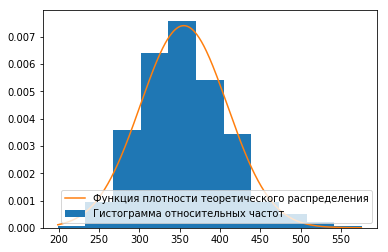

In [42]:
plt.hist(x,bins=bins, density=True,label='Гистограмма относительных частот')
x_axis = np.arange(min(x),max(x))
plt.plot(x_axis,sts.norm.pdf(x_axis,loc=np.mean(x), scale=np.var(x)**(1/2)), 
         label='Функция плотности теоретического распределения')
plt.legend(loc=4)

In [43]:
intervals, x_obs, x_obs*len(x)

([(199, 233.27272727272728),
  (233.27272727272728, 267.54545454545456),
  (267.54545454545456, 301.8181818181818),
  (301.8181818181818, 336.09090909090907),
  (336.09090909090907, 370.3636363636363),
  (370.3636363636363, 404.63636363636357),
  (404.63636363636357, 438.9090909090908),
  (438.9090909090908, 473.1818181818181),
  (473.1818181818181, 507.4545454545453),
  (507.4545454545453, 541.7272727272726),
  (541.7272727272726, 575.9999999999999)],
 array([0.0027959 , 0.03261883, 0.12301957, 0.21901212, 0.26001864,
        0.18546132, 0.11742777, 0.03261883, 0.01770736, 0.00745573,
        0.00186393]),
 array([  3.,  35., 132., 235., 279., 199., 126.,  35.,  19.,   8.,   2.]))

Построить гистограмму относительных частот и функцию плотности теоретического распределения на одном графике

[]

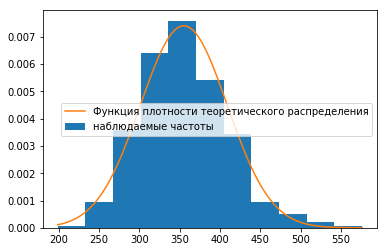

In [44]:
x_axis=np.linspace(min(x),max(x),100)
plt.hist(x,bins=bins, density=True,label='наблюдаемые частоты')
plt.plot(x_axis, sts.norm.pdf(x_axis,loc=x.mean(),scale=sts.describe(x)[3]**(1/2)), label='Функция плотности теоретического распределения')
plt.legend()
plt.plot()

4.2. Проверка гипотезы о нормальности на основе коэффициента асимметрии и эксцесса 

In [45]:
sts.jarque_bera(x)

(44.13218548064099, 2.611064697788379e-10)

In [46]:
assim, excess = sts.describe(x)[4], sts.describe(x)[5]
jarque_bera = len(x) * (assim**2/6 + excess**2/24)
p = 1 - sts.chi2.cdf(jarque_bera, 2)
jarque_bera, p

(44.132185480641, 2.611064697788379e-10)

In [47]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
8,9,A5 A7 A8,A7,A7,A7,A7 A8,A7 A8,A7,A7 A8,A4 A20,A4 A7,A7 A8,A5 A7 A8,A17 A12,A17 A12,A17 A7 A12


5.1 Критерий знаков


In [48]:
x = DF['A7']
y = DF['A8']

In [49]:
K = 0
for i in range(len(x)):
    if x[i]-y[i] > 0:
        K+=1
Z = 2 * np.sqrt(len(x)) * (K/len(x) - (1/2))
p = sts.norm.cdf(Z)
print('Sign test: Zstat =',Z,' p-val =', p)

Sign test: Zstat = -32.5735099550566  p-val = 4.865517545960753e-233


5.2. Критерий хи-квадрат

In [50]:
def chisquaretwosample(x, y, k):
    nx = x.size
    ny = y.size
    a = min(min(x), min(y))
    b = max(max(x), max(y))
    h = (b - a) / k
    intervals = [] 
    for i in range(k):
        intervals.append((a+h*i,a+h+h*i))
    fx = np.zeros(k)
    fy = np.zeros(k)
    c = a
    for item in x:
        index = (item - a) // h
        if index == bins:
            fx[int(index) - 1] += 1
        else:
            fx[int(index)] += 1
    for item in y:
        index = (item - a) // h
        if index == bins:
            fy[int(index) - 1] += 1
        else:
            fy[int(index)] += 1
    z = 0
    for i in range(k):
        z += ((fx[i]/nx - fy[i]/ny)**2) / (fx[i] + fy[i])
    z = z * nx * ny
    p = 1 - sts.chi2.cdf(z ,df=k-1)
    return z, p, intervals, fx, fy, fx/len(x), fy/len(x)

In [51]:
chisquaretwosample(x, y, bins)

(428.68924840099226,
 0.0,
 [(199.0, 259.6363636363636),
  (259.6363636363636, 320.27272727272725),
  (320.27272727272725, 380.9090909090909),
  (380.9090909090909, 441.5454545454545),
  (441.5454545454545, 502.18181818181813),
  (502.1818181818182, 562.8181818181818),
  (562.8181818181818, 623.4545454545455),
  (623.4545454545455, 684.090909090909),
  (684.090909090909, 744.7272727272727),
  (744.7272727272727, 805.3636363636364),
  (805.3636363636364, 866.0)],
 array([ 27., 262., 467., 256.,  50.,  10.,   1.,   0.,   0.,   0.,   0.]),
 array([  2.,  98., 260., 306., 187., 134.,  59.,  15.,   7.,   3.,   2.]),
 array([0.02516309, 0.24417521, 0.43522833, 0.23858341, 0.04659832,
        0.00931966, 0.00093197, 0.        , 0.        , 0.        ,
        0.        ]),
 array([0.00186393, 0.09133271, 0.24231128, 0.28518173, 0.17427773,
        0.1248835 , 0.05498602, 0.0139795 , 0.00652377, 0.0027959 ,
        0.00186393]))

In [52]:
intervals = chisquaretwosample(x, y, bins)[2]
for i in range(bins):
    intervals[i] = intervals[i][0]
intervals.append(intervals[-1]+(intervals[1]-intervals[0]))


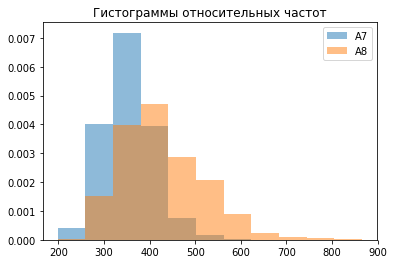

In [53]:
plt.hist(x, bins=intervals, label='A7', density=True, alpha=0.5)
plt.hist(y, bins=intervals, label='A8', density=True, alpha=0.5)
plt.title('Гистограммы относительных частот')
plt.legend()

6. Таблицы сопряжённости

In [54]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
8,9,A5 A7 A8,A7,A7,A7,A7 A8,A7 A8,A7,A7 A8,A4 A20,A4 A7,A7 A8,A5 A7 A8,A17 A12,A17 A12,A17 A7 A12


In [55]:
#x и y категориальные признаки
x = DF['A4']
y = DF['A20']

In [56]:
x.values, y.values

(array(['IIB', 'I', 'IIA', ..., 'IIB', 'IIB', 'I'], dtype=object),
 array(['N', 'Y', 'N', ..., 'N', 'N', 'Y'], dtype=object))

In [57]:
crossTab=pd.crosstab(x,y)
crossTab

A20,N,Y
A4,,
I,6,174
IIA,207,152
IIB,525,9


In [58]:
sts.chi2_contingency(crossTab, correction=False)

(596.6359677097043,
 2.7678704512712918e-130,
 2,
 array([[123.80242311,  56.19757689],
        [246.91705499, 112.08294501],
        [367.2805219 , 166.7194781 ]]))

7. Дисперсионный анализ

In [59]:
x = DF['A4']#факторный признак
y = DF['A7']#результативный 

In [60]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
8,9,A5 A7 A8,A7,A7,A7,A7 A8,A7 A8,A7,A7 A8,A4 A20,A4 A7,A7 A8,A5 A7 A8,A17 A12,A17 A12,A17 A7 A12


In [61]:
sts.describe(y)

DescribeResult(nobs=1073, minmax=(199, 576), mean=355.08853681267476, variance=2904.289728547384, skewness=0.44737126211025235, kurtosis=0.4319131904766307)

In [62]:
y.groupby(x).size()

A4
I      180
IIA    359
IIB    534
Name: A7, dtype: int64

In [63]:
y.groupby(x).var()

A4
I      1825.402110
IIA    1787.997479
IIB    1943.135882
Name: A7, dtype: float64

In [64]:
y.groupby(x).mean()

A4
I      412.711111
IIA    369.050139
IIB    326.279026
Name: A7, dtype: float64

In [65]:
for item in y.groupby(x): 
    print(sts.describe(item[1]))

DescribeResult(nobs=180, minmax=(323, 576), mean=412.7111111111111, variance=1825.4021104903786, skewness=0.7415284194066023, kurtosis=0.8022828568685099)
DescribeResult(nobs=359, minmax=(278, 526), mean=369.050139275766, variance=1787.9974790308274, skewness=0.7330904733340218, kurtosis=0.999550220152901)
DescribeResult(nobs=534, minmax=(199, 557), mean=326.2790262172285, variance=1943.1358819767977, skewness=0.6239919695567546, kurtosis=1.5776722129191976)


In [66]:
Dw = 0
for item in y.groupby(x): 
    Dw += sts.describe(item[1])[3]*(sts.describe(item[1])[0]-1)
Dw/=len(y)
print('Внутригрупповая дисперсия',Dw)

Внутригрупповая дисперсия 1866.3014914859712


In [67]:
Db = 0
for item in y.groupby(x): 
    Db += sts.describe(item[1])[0]*(sts.describe(item[1])[2]-sts.describe(y)[2])**2
Db/=len(y)
print('Межгрупповая дисперсия',Db)


Межгрупповая дисперсия 1035.2815364756277


In [68]:
print('Общая дисперсия', np.var(y))
print('Dw+Db =', Dw+Db)

Общая дисперсия 2901.5830279615984
Dw+Db = 2901.583027961599


In [69]:
nusquare = Db / (Db + Dw)
print('ЭКД =', nusquare)
print('ЭКО =', np.sqrt(nusquare))

ЭКД = 0.3567988668595594
ЭКО = 0.5973264324132654


In [70]:
zstatFtest = Db / (len(y.groupby(x))-1) / Dw * (len(y)-len(y.groupby(x)))
pvalFtest = 1 - sts.f.cdf(zstatFtest, len(y.groupby(x))-1, len(y)-len(y.groupby(x)))
print('Дисперсионный анализ: Z-val',zstatFtest,' p-val', pvalFtest)

Дисперсионный анализ: Z-val 296.77714160398517  p-val 1.1102230246251565e-16


In [71]:
xarrr = []#чисто для проверки
for item in y.groupby(x): 
    xarrr.append(item[1])
print(sts.f_oneway(xarrr[0],xarrr[1],xarrr[2]))


F_onewayResult(statistic=296.7771416039853, pvalue=2.921046380968241e-103)


8. Корреляционный анализ


In [72]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
8,9,A5 A7 A8,A7,A7,A7,A7 A8,A7 A8,A7,A7 A8,A4 A20,A4 A7,A7 A8,A5 A7 A8,A17 A12,A17 A12,A17 A7 A12


In [73]:
x=DF['A7']
y=DF['A8']

In [74]:
sts.pearsonr(x,y)

(0.9282016936226041, 0.0)

In [75]:
sts.spearmanr(x,y)

SpearmanrResult(correlation=0.9376540833607301, pvalue=0.0)

In [76]:
sts.kendalltau(x,y)

KendalltauResult(correlation=0.7868780458733714, pvalue=0.0)

In [77]:
#доверительный интервал для линейного коэффициента корреляции
def proveinterval(r, n, alpha):
    u = sts.norm.ppf(1-alpha/2)
    high = r + r * (1-r**2)/(2*n) + u * (1 - r**2)/np.sqrt(n)
    low = r + r * (1-r**2)/(2*n) - u * (1 - r**2)/np.sqrt(n)
    return high, low

In [78]:
for alpha in [0.01,0.05,0.1]:
    print(alpha,'  low',proveinterval(sts.pearsonr(x,y)[0], len(x), alpha)[1],
                'high',proveinterval(sts.pearsonr(x,y)[0], len(x), alpha)[0])

0.01   low 0.917375183532674 high 0.939147963025114
0.05   low 0.9199780539498531 high 0.936545092607935
0.1   low 0.9213098247162831 high 0.935213321841505


In [79]:
#проверка значимости коэффициентов корреляции
def zstat(r, n):
    z = r/((1-r**2)**(1/2)) * (n-2)**(1/2)
    p = min(sts.t.cdf(z, df = n-2), 1-sts.t.cdf(z, df = n-2))*2
    return z, p

In [80]:
zstat(sts.pearsonr(x,y)[0], len(x))

(81.64014397824117, 0.0)

In [81]:
zstat(sts.spearmanr(x,y)[0], len(x))

(88.28669379903945, 0.0)

In [82]:
def zstattau(t, n):
    z = t * np.sqrt(9*n*(n+1)/(2*(2*n+5)))
    p = min(sts.norm.cdf(z), 1-sts.norm.cdf(z))*2
    return z, p

In [83]:
zstattau(sts.kendalltau(x,y)[0], len(x))

(38.63629575753953, 0.0)

8.2 Расчёт множественных коэффициентов корреляции

In [84]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
8,9,A5 A7 A8,A7,A7,A7,A7 A8,A7 A8,A7,A7 A8,A4 A20,A4 A7,A7 A8,A5 A7 A8,A17 A12,A17 A12,A17 A7 A12


In [85]:
x = DF['A5']
y = DF['A7']
z = DF['A8']

In [86]:
for num1, i in enumerate((x,y,z)):
    for num2, j in enumerate((x,y,z)):
        print(num1,num2,sts.kendalltau(i,j))

0 0 KendalltauResult(correlation=0.9999999999999999, pvalue=0.0)
0 1 KendalltauResult(correlation=0.7653615796866247, pvalue=3.5607194803596525e-306)
0 2 KendalltauResult(correlation=0.8405274510615323, pvalue=0.0)
1 0 KendalltauResult(correlation=0.7653615796866247, pvalue=3.5607194803596525e-306)
1 1 KendalltauResult(correlation=0.9999999999999999, pvalue=0.0)
1 2 KendalltauResult(correlation=0.7868780458733714, pvalue=0.0)
2 0 KendalltauResult(correlation=0.8405274510615321, pvalue=0.0)
2 1 KendalltauResult(correlation=0.7868780458733714, pvalue=0.0)
2 2 KendalltauResult(correlation=1.0, pvalue=0.0)


In [87]:
sts.kendalltau(x,z)

KendalltauResult(correlation=0.8405274510615323, pvalue=0.0)

Рассчитать точечную оценку коэффициента конкордации

In [88]:
w = 2/9 * sum((sts.spearmanr(x, y)[0], sts.spearmanr(x, z)[0], sts.spearmanr(y, z)[0])) + 1/3
w

0.9617379161924835

In [89]:
k = 3
n = len(x)
w = 0
for i in range(n):
    w += (sts.rankdata(x)[i] +  sts.rankdata(y)[i] + sts.rankdata(z)[i] - k * (n+1)/2)**2
w = w * 12 / ((n**3 - n )* k**2)
w

0.9617120846079477

In [90]:
zw = w * (k-1) * n
p = 1 - sts.chi2.cdf(zw, df=n-1)
print('значимость конкордации',zw,'p-val',p)

значимость конкордации 2063.8341335686555 p-val 0.0


In [91]:
crit = sts.chi2.ppf(0.05, df=n-1) 
pw = crit*0.05
crit, pw

(996.9916331268273, 49.84958165634137)

9. Регрессионный анализ
9.1 Простейшая линейная регрессионная модель

In [92]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
8,9,A5 A7 A8,A7,A7,A7,A7 A8,A7 A8,A7,A7 A8,A4 A20,A4 A7,A7 A8,A5 A7 A8,A17 A12,A17 A12,A17 A7 A12


In [93]:
x = DF['A17']
y = DF['A12']

In [94]:
sts.describe(x)

DescribeResult(nobs=1073, minmax=(6, 510), mean=73.21155638397018, variance=5450.900164832872, skewness=2.11568092104278, kurtosis=5.5625964387790106)

In [95]:
sts.describe(y)

DescribeResult(nobs=1073, minmax=(246, 717), mean=446.4818266542404, variance=5511.615574272162, skewness=0.43724282451140445, kurtosis=0.23166068004916518)

In [96]:
class Regression():
    '''
    Одномерная регрессия, по умолчанию линейная
    '''
    c = []
    n = 0
    k = 0
    x = []
    y = []
    f = [] 
    Dres = 0
    Dregr = 0
    
    def __init__(self, n=1):
        self.n = n+1
        
    def p(self, x, i):
        return x**i
    
    def fit(self, x, y):
        self.x = x
        self.y = y
        self.k = len(x)
        self.f = np.zeros((len(x), self.n))
        for i in range(len(x)):
            for j in range(self.n):
                self.f[i,j] = self.p(x[i], j)
        self.c = np.linalg.inv(self.f.transpose() @ self.f) @ \
                self.f.transpose() @ y #находим вектор коэффицентов
        self.Dregr = sum((np.mean(y)-myRegr.predict(x[i]))**2 for i in range(len(x)))
        self.Dres = 1/(self.k) * sum((self.predict(self.x[i])-self.y[i])**2 for i in range(self.k)) 
        
    def predict(self, x):
        res = 0
        for i in range(self.n):
            res+=self.p(x, i)*self.c[i]  
        return res
    
    def proveIntervals(self, x, alpha):
        Dres = 1/(self.k - self.n) * sum((self.predict(self.x[i])-self.y[i])**2 for i in range(self.k))
        res = self.predict(x)
        phi = np.array([self.p(x, i) for i in range(self.n)])
        high = res + sts.t.ppf(1-alpha/2, df=self.k-self.n)*np.sqrt(Dres)* np.sqrt(np.dot(np.dot(phi.transpose(),
                    np.linalg.inv(self.f.transpose() @ self.f)), phi))
        low = res - sts.t.ppf(1-alpha/2, df=self.k-self.n)*np.sqrt(Dres)* np.sqrt(np.dot(np.dot(phi.transpose(),
                    np.linalg.inv(self.f.transpose() @ self.f)), phi))
        return high, low
    
    def proveIntervalsForCoefs(self, alpha):
        Dres = 1/(self.k - self.n) * sum((self.predict(self.x[i])-self.y[i])**2 for i in range(self.k))
        interv = []
        for j in range(self.n):
            high = self.c[j] + sts.t.ppf(1-alpha/2, df=self.k-self.n)*np.sqrt(Dres) * \
                   np.linalg.inv(self.f.transpose() @ self.f)[j,j]
            low =  self.c[j]- sts.t.ppf(1-alpha/2, df=self.k-self.n)*np.sqrt(Dres) *  \
                   np.linalg.inv(self.f.transpose() @ self.f)[j,j]
            interv.append((low, high))
        return interv
    
    def significal(self):
        r2 = 1 - self.Dres/np.var(self.y)
        z = r2 / (1 - r2) * (self.k-self.n)/(self.n-1)
        p = 1 - sts.f.cdf(z,dfn=self.n-1,dfd=self.k-self.n)
        return z, p
    

In [97]:
myRegr = Regression()
myRegr.fit(x.values,y.values)
myRegr.c

array([411.46178042,   0.47834041])

In [98]:
from sklearn.linear_model import LinearRegression as lr
mylr = lr().fit(x.values.reshape((len(x.values),1)), y.values)
mylr.coef_, mylr.intercept_

(array([0.47834041]), 411.4617804233374)

In [99]:
Dregr = sum((np.mean(y)-myRegr.predict(x[i]))**2 for i in range(len(x)))
Dregr /= len(x)
print('D regr', Dregr,'несмещ',Dregr*len(x))

D regr 1246.0556604276062 несмещ 1337017.7236388214


In [100]:
Dres = myRegr.Dres
print('D остаточная', Dres,' несмещ', Dres*len(x)/(len(x)-2))

D остаточная 4260.423273048398  несмещ 4268.379245547088


In [101]:
print('Dres+Dregr',Dres+Dregr)

Dres+Dregr 5506.478933476004


In [102]:
np.var(y), sts.describe(y)[3]

(5506.478933476012, 5511.615574272162)

In [103]:
#КО и КД
nusquare = Dregr / (Dregr + Dres)
print('КД =', nusquare)
print('КО =', np.sqrt(nusquare))

КД = 0.2262890089077349
КО = 0.4756984432471215


In [104]:
b0, b1 =myRegr.c
b0
for alpha in [0.01, 0.05, 0.1]:
    low = b0 - sts.t.ppf(1-alpha/2, df=len(x)-2) * np.sqrt(sum(x**2)*Dres/(len(x)-2)/len(x)/np.var(x))
    high = b0 + sts.t.ppf(1-alpha/2, df=len(x)-2) * np.sqrt(sum(x**2)*Dres/(len(x)-2)/len(x)/np.var(x))
    print('b0',alpha,' :',low, high)

b0 0.01  : 404.2120947609312 418.7114660857435
b0 0.05  : 405.9490512213435 416.9745096253312
b0 0.1  : 406.8365798877863 416.08698095888843


In [105]:
b0, b1 =myRegr.c
b1
for alpha in [0.01, 0.05, 0.1]:
    low = b1 - sts.t.ppf(1-alpha/2, df=len(x)-2) * np.sqrt(Dres/(len(x)-2)/np.var(x))
    high = b1 + sts.t.ppf(1-alpha/2, df=len(x)-2) * np.sqrt(Dres/(len(x)-2)/np.var(x))
    print('b1',alpha,' :',low, high)

b1 0.01  : 0.4085988515031706 0.5480819776062276
b1 0.05  : 0.4253082736964358 0.5313725554129625
b1 0.1  : 0.433846248904345 0.5228345802050532


In [106]:
for alpha in [0.01, 0.05, 0.1]:
    print(alpha, myRegr.proveIntervalsForCoefs(alpha=alpha))

0.01 [(411.15002417264554, 411.7735366740292), (0.47831156360125365, 0.47836926550814457)]
0.05 [(411.2247180364804, 411.6988428101943), (0.4783184760181928, 0.47836235309120545)]
0.1 [(411.26288418909945, 411.66067665757527), (0.47832200804005265, 0.4783588210693456)]


In [107]:
sorted(x)[-1]

510

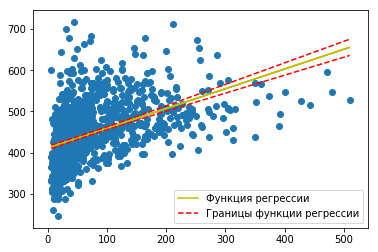

In [108]:

plt.plot(x, myRegr.predict(x), color='y', label='Функция регрессии')
x_axis = np.arange(6,511)
high = []
low = []
for x1 in x_axis:
    high.append(myRegr.proveIntervals(x1, 0.1)[0])
    low.append(myRegr.proveIntervals(x1, 0.1)[1])
plt.plot(x_axis, high, color='r', label='Границы функции регрессии', linestyle='--')
plt.plot(x_axis, low, color='r', linestyle='--')
plt.legend()
plt.scatter(x,y)

Text(0.5,1,'График остатков')

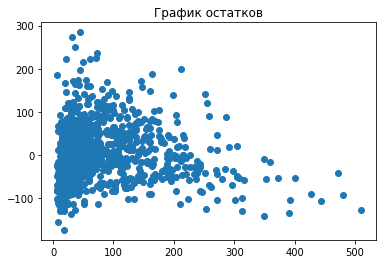

In [109]:
x_axis = np.arange(6,511)
plt.scatter(x, y-myRegr.predict(x))
plt.title('График остатков')

Проверка значимости линейной регрессионной модели

In [110]:
myRegr.significal()

(313.23779981210583, 1.1102230246251565e-16)

9.2 Линейная регрессионная модель общего вида

In [111]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
8,9,A5 A7 A8,A7,A7,A7,A7 A8,A7 A8,A7,A7 A8,A4 A20,A4 A7,A7 A8,A5 A7 A8,A17 A12,A17 A12,A17 A7 A12


In [112]:
myRegr2 = Regression(2)
myRegr2.fit(x.values,y.values)
myRegr2.c

array([ 3.89183259e+02,  1.07249549e+00, -1.96381480e-03])

In [113]:
mylr2 = np.polynomial.polynomial.polyfit(x.values, y.values, deg=2)
mylr2

array([ 3.89183259e+02,  1.07249549e+00, -1.96381480e-03])

In [114]:
Dregr2 = sum((np.mean(y)-myRegr2.predict(x[i]))**2 for i in range(len(x)))
Dregr2 /= len(x)
print('D regr2', Dregr2,'несмещ',Dregr2*len(x)/2)

D regr2 1599.0702136745454 несмещ 857901.1696363935


In [115]:
Dres2 = myRegr2.Dres
print('D остаточная',Dres2,'несмещ', Dres2*len(x)/(len(x)-3))

D остаточная 3907.408719801455 несмещ 3918.3640713523005


In [116]:
print('Dregr2 + Dres2 =',Dregr2+Dres2)

Dregr2 + Dres2 = 5506.478933476001


In [117]:
np.var(y), sts.describe(y)[3]

(5506.478933476012, 5511.615574272162)

In [118]:
#КО и КД
nusquare2 = Dregr2 / (Dregr2 + Dres2)
print('КД =', nusquare2)
print('КО =', np.sqrt(nusquare2))

КД = 0.2903979535730507
КО = 0.5388858446582641


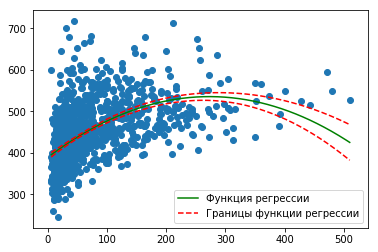

In [119]:
x_axis = np.arange(6,511)
plt.plot(x_axis, myRegr2.predict(x_axis), color = 'g', label='Функция регрессии')
high = []
low = []
for x1 in x_axis:
    high.append(myRegr2.proveIntervals(x1, 0.1)[0])
    low.append(myRegr2.proveIntervals(x1, 0.1)[1])
plt.plot(x_axis, high, color='r', label='Границы функции регрессии', linestyle='--')
plt.plot(x_axis, low, color='r',linestyle='--')
plt.legend()
plt.scatter(x,y)

Text(0.5,1,'График остатков')

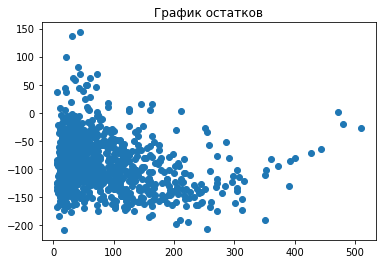

In [136]:
plt.scatter(x, y-myRegr2.predict(x))
plt.title('График остатков')

In [121]:
myRegr2.significal()

(218.9437106951424, 1.1102230246251565e-16)

9.3 Множественная линейная регрессионная модель

In [122]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
8,9,A5 A7 A8,A7,A7,A7,A7 A8,A7 A8,A7,A7 A8,A4 A20,A4 A7,A7 A8,A5 A7 A8,A17 A12,A17 A12,A17 A7 A12


In [123]:
x = DF['A17']
y = DF['A7']
z = DF['A12']

In [124]:
mylr3 = lr().fit(np.array((x.values, y.values)).transpose(),z.values)
mylr3.coef_, mylr3.intercept_

(array([-0.00987467,  1.34588459]), -30.70342314734586)

In [125]:
from mpl_toolkits.mplot3d import Axes3D

In [126]:
sts.describe(y)

DescribeResult(nobs=1073, minmax=(199, 576), mean=355.08853681267476, variance=2904.289728547384, skewness=0.44737126211025235, kurtosis=0.4319131904766307)

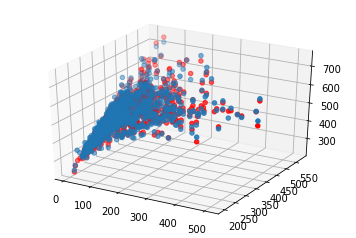

In [127]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x.values, y.values, z.values)
ax.scatter3D(x.values, y.values, mylr3.predict(np.array((x.values, y.values)).transpose()), color='r')

In [128]:
Dregr3 = sum((np.mean(z)-mylr3.predict(np.array((x.values, y.values)).transpose()))**2)
Dregr3 /= len(x)
print('D regr3', Dregr3,'несмещ', Dregr3*len(x)/2)

D regr3 5203.965772591322 несмещ 2791927.6369952443


In [129]:
Dres3 = sum((mylr3.predict(np.array((x.values, y.values)).transpose())-z)**2)
Dres3 /= len(x)
print('D остаточная', Dres3,'несмещ', Dres3*len(x)/(len(x)-3))

D остаточная 302.5131608846922 несмещ 303.3613286254904


In [130]:
print('Dregr3 + Dres3 =',Dregr3+Dres3)

Dregr3 + Dres3 = 5506.478933476014


In [131]:
np.var(z), sts.describe(z)[3]

(5506.478933476012, 5511.615574272162)

In [132]:
#КО и КД
nusquare3 = Dregr3 / (Dregr3 + Dres3)
print('МКД =', nusquare3)
print('МКО =', np.sqrt(nusquare3))

МКД = 0.9450623230308577
МКО = 0.972143159740816


In [133]:
sum((mylr3.predict(np.array((x.values, y.values)).transpose())-z)**2)/len(x) #SSE

302.5131608846922

In [134]:
for i in range(10):
    print(mylr3.predict(np.array((x.values, y.values)).transpose())[i], z[i])

456.4179265989582 471
549.5535085515392 572
411.89511370189894 442
525.4954553666207 557
385.5135832683439 376
386.17518638033187 383
441.4058279625088 427
469.6851370789841 451
402.40479885433365 404
451.81741644822887 445
